<a href="https://colab.research.google.com/github/jungmin0710/K-digital-PythonDeepLearning/blob/main/SimpleRNN_Test_Code_CPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SimpleRNN Test Code

In [1]:
import warnings
warnings.filterwarnings('ignore')

## 0.Import Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt


## 1.SimpleRNN - without Normalization

### 1)Sample Data
* Inputs 데이터 생성(100, 5, 1)

In [4]:
X = [[[i + j] for i in range(5)] for j in range(100)]

X[:3], X[-3:]

([[[0], [1], [2], [3], [4]],
  [[1], [2], [3], [4], [5]],
  [[2], [3], [4], [5], [6]]],
 [[[97], [98], [99], [100], [101]],
  [[98], [99], [100], [101], [102]],
  [[99], [100], [101], [102], [103]]])

* Outputs 데이터 생성(100, 1)

In [5]:
y = [(i + 5) for i in range(100)]

y[:3], y[-3:]

([5, 6, 7], [102, 103, 104])

### 2)numpy_Array Casting

In [6]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

X.shape, y.shape

((100, 5, 1), (100,))

### 3) Train vs Test Split
* 80:20

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

### 4) Keras SimpleRNN Modeling


#### (1) Model Define & Summary
* Unit(output_dim) : 3
* input_shape(input_length, imput_dim) : (5,1)
* return_sequences = False : 최종 Unit만 출력
* layers.Dense(1) : y_hat

In [9]:
from keras import models, layers

model_1 = models.Sequential(name = 'SimpleRNN_1')
model_1.add(layers.SimpleRNN(3,
                             input_shape = (5,1),
                             return_sequences = False))

model_1.add(layers.Dense(1))

model_1.summary()

Model: "SimpleRNN_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 3)                 15        
_________________________________________________________________
dense (Dense)                (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


#### (2) Model Compile

In [10]:
model_1.compile(loss = 'mse',
                optimizer = 'adam',
                metrics = ['accuracy'])

#### (3) Model Fit

In [11]:
Hist_1 = model_1.fit(X_train, y_train,
                     epochs = 100,
                     batch_size = 8,
                     validation_data = (X_test, y_test))

Epoch 1/100
10/10 [==============================] - 2s 76ms/step - loss: 3910.1325 - accuracy: 0.0000e+00 - val_loss: 3754.1140 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 3535.4153 - accuracy: 0.0000e+00 - val_loss: 3749.6426 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 3975.8387 - accuracy: 0.0000e+00 - val_loss: 3745.0886 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 3618.1402 - accuracy: 0.0000e+00 - val_loss: 3740.4524 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 3692.9811 - accuracy: 0.0000e+00 - val_loss: 3735.5249 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 3957.0152 - accuracy: 0.0000e+00 - val_loss: 3729.9077 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - lo

#### (4) Model Predict

In [12]:
y_hat = model_1.predict(X_test)

#### (5) Result Visualization
* Loss

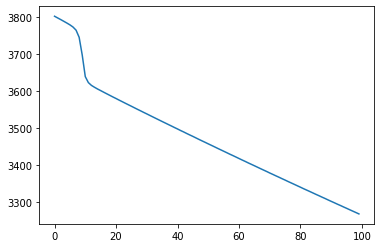

In [13]:
plt.plot(Hist_1.history['loss'])

plt.show()

* 학습 되지 않음
  * 녹색 -> 정답(y_test) 
  * 적색 -> 예측(y_hat)

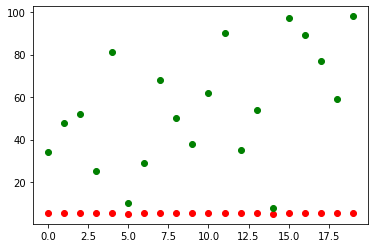

In [14]:
plt.scatter(range(20), y_hat, c = 'r') 
plt.scatter(range(20), y_test, c = 'g') 
plt.show()
#정규화를 하지 않았을 때 학습이 전혀 되지 않았음

## 2.SimpleRNN - with Normalization

### 1) Sample Data - with Normalization

In [15]:
X = [[[(i + j)] for i in range(5)] for j in range(100)] 
y = [(i + 5) for i in range(100)]

X = (X - np.min(X)) / (np.max(X) - np.min(X)) 
y = (y - np.min(y)) / (np.max(y) - np.min(y))

### 2) Casting

In [16]:
X = np.array(X, dtype = float) 
y = np.array(y, dtype = float)

X.shape, y.shape

((100, 5, 1), (100,))

### 3) Train vs. Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, 
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

### 4) Keras SimpleRNN Modeling

#### (1) Model Define & Summary
* None : input_length 자동 맞춤

In [18]:
model_2 = models.Sequential(name = 'SimpleRNN_2') 
model_2.add(layers.SimpleRNN(3,
                             input_shape = (None, 1), 
                             return_sequences = False))

model_2.add(layers.Dense(1)) 
model_2.summary()

Model: "SimpleRNN_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 3)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


#### (2) Model Compile

In [19]:
model_2.compile(loss = 'mse', 
                optimizer = 'adam', 
                metrics = ['accuracy'])

#### (3) Model Fit

In [20]:
Hist_2 = model_2.fit(X_train, y_train, 
                     epochs = 100, 
                     batch_size = 8,
                     validation_data = (X_test, y_test))

Epoch 1/100
10/10 [==============================] - 1s 35ms/step - loss: 0.3000 - accuracy: 0.0136 - val_loss: 0.2743 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.2532 - accuracy: 0.0050 - val_loss: 0.2443 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 0.2489 - accuracy: 0.0136 - val_loss: 0.2159 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.2367 - accuracy: 0.0066 - val_loss: 0.1895 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.1675 - accuracy: 0.0107 - val_loss: 0.1663 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.1433 - accuracy: 0.0050 - val_loss: 0.1447 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.1538 - accuracy: 0.0107 - val_loss: 0.1255 - val_accur

#### (4) Model Predict

In [21]:
y_hat = model_2.predict(X_test)

#### (5) Result Visualization
* Loss

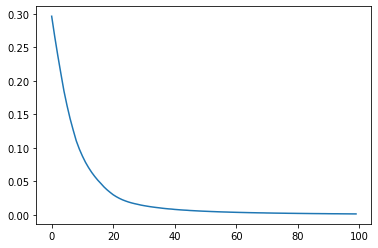

In [22]:
plt.plot(Hist_2.history['loss']) 

plt.show()

* 학습 진행
  * 녹색 -> 정답(y_test) 
  * 적색 -> 예측(y_hat)

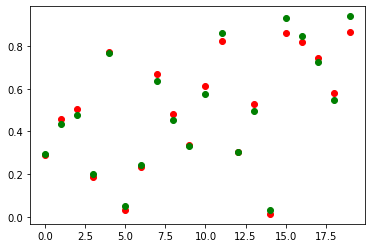

In [23]:
plt.scatter(range(20), y_hat, c = 'r') 
plt.scatter(range(20), y_test, c = 'g') 
plt.show()
#정규화를 하니 학습이 진행되었다

## 3.Stacked_SimpleRNN

1) Model Define & Summary
* return_sequences = True

In [24]:
model_4 = models.Sequential(name = 'Stackd_RNN') 

model_4.add(layers.SimpleRNN(3,
                             input_shape = (None, 1), 
                             return_sequences = True))

model_4.add(layers.SimpleRNN(3,
                             input_shape = (None, 1), 
                             return_sequences = False))

model_4.add(layers.Dense(1)) 

model_4.summary()

Model: "Stackd_RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, None, 3)           15        
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 3)                 21        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


### 2) Model Compile

In [25]:
model_4.compile(loss = 'mse', 
                optimizer = 'adam', 
                metrics = ['accuracy'])

### 3) Model Fit

In [26]:
Hist_4 = model_4.fit(X_train, y_train, 
                     epochs = 100, 
                     batch_size = 8,
                     validation_data = (X_test, y_test))

Epoch 1/100
10/10 [==============================] - 2s 48ms/step - loss: 0.0232 - accuracy: 0.0518 - val_loss: 0.0185 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0169 - accuracy: 0.0157 - val_loss: 0.0139 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0159 - accuracy: 0.0159 - val_loss: 0.0104 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0107 - accuracy: 0.0101 - val_loss: 0.0079 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0072 - accuracy: 0.0130 - val_loss: 0.0063 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.0394 - val_loss: 0.0051 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0048 - accuracy: 0.0280 - val_loss: 0.0043 - val_accur

### 4) Model Predict

In [27]:
y_hat = model_4.predict(X_test)

### 5) 학습 결과 시각화

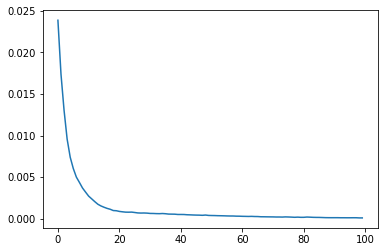

In [28]:
plt.plot(Hist_4.history['loss']) 
plt.show()

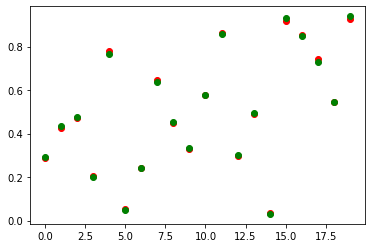

In [29]:
plt.scatter(range(20), y_hat, c = 'r') 
plt.scatter(range(20), y_test, c = 'g') 
plt.show()
#학습이 잘 진행됨

## 4.'return_sequences' Output_Options
* 'input_length'에 대한 Sequance 전체를 출력할지 설정 
  * 'False' vs. 'True'

### 1) 실습데이터 생성

In [30]:
X = [[[i + j] for i in range(5)] for j in range(100)] 
y = [i + 5 for i in range(100)]

In [31]:
X = np.array(X, dtype = float) 
y = np.array(y, dtype = float)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, 
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

### 2) 테스트용 Input Data

In [33]:
X_test[0].reshape(1, 5, 1)

array([[[29.],
        [30.],
        [31.],
        [32.],
        [33.]]])

### 3) False_Option
* 마지막 Output만 출력 
  * Unit -> 1

In [34]:
Model_False = models.Sequential() 
Model_False.add(layers.SimpleRNN(1,
                                 input_shape = (5, 1), 
                                 return_sequences = False))

Model_False.compile(loss = 'mse', 
                    optimizer = 'adam', 
                    metrics = ['accuracy'])

* 마지막 Output만 출력 
  * Unit -> 3

In [35]:
Model_False = models.Sequential() 
Model_False.add(layers.SimpleRNN(3,
                                 input_shape = (5, 1), 
                                 return_sequences = False))

Model_False.compile(loss = 'mse', 
                    optimizer = 'adam', 
                    metrics = ['accuracy'])

In [36]:
Model_False.predict(X_test[0].reshape(1, 5, 1))

array([[-0.99397326,  0.9999988 , -0.01907868]], dtype=float32)

### 4) True_Option
* 매 순환마다 Output 출력 
  * Unit -> 1
  * input_length -> 5

In [38]:
Model_True = models.Sequential() 
Model_True.add(layers.SimpleRNN(1,
                                input_shape = (5, 1), 
                                return_sequences = True))

Model_True.compile(loss = 'mse', 
                   optimizer = 'adam',
                   metrics = ['accuracy'])

In [39]:
Model_True.predict(X_test[0].reshape(1, 5, 1))

array([[[-0.9999945 ],
        [-0.99999964],
        [-0.9999998 ],
        [-1.        ],
        [-1.        ]]], dtype=float32)

* 매 순환마다 Output만 출력 
  * Unit -> 3
  * input_length -> 5

In [40]:
Model_True = models.Sequential() 
Model_True.add(layers.SimpleRNN(3,
                                input_shape = (5, 1), 
                                return_sequences = True))

Model_True.compile(loss = 'mse', 
                   optimizer = 'adam', 
                   metrics = ['accuracy'])

In [41]:
Model_True.predict(X_test[0].reshape(1, 5, 1))

array([[[ 1.        ,  0.98958385, -1.        ],
        [ 1.        ,  0.9993746 , -1.        ],
        [ 1.        ,  0.99948806, -1.        ],
        [ 1.        ,  0.9995728 , -1.        ],
        [ 1.        ,  0.9996436 , -1.        ]]], dtype=float32)

본 내용은 2021/03/25(목)에 학습한 내용입니다.